In [ ]:
## This is done using ANN(Artificial Neural Network)

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# This "cuda" will only work if i have a "NVIDIA GPU", but i don't have it
tf.config.experimental.list_physical_devices()
# tf.test.is_built_with_cuda()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
# Keras Datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()   # It is a small images dataset with 60,000 images of 32x32

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
def plot_sample(index):
    plt.figure(figure = (10,1))
    plt.imshow(x_train[index])

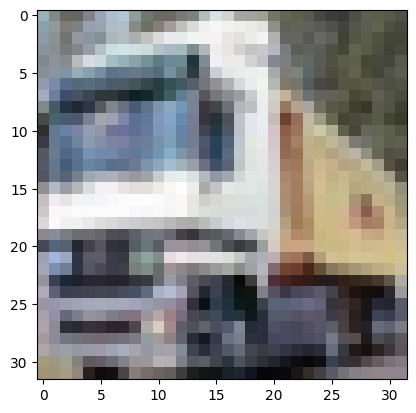

In [8]:
plot_sample(1)

In [9]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

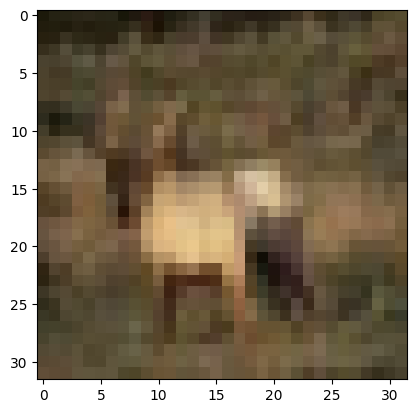

In [10]:
plot_sample(3)

In [11]:
classes[y_train[3][0]]

'deer'

In [25]:
# Scalling Data
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [13]:
# One Hot Encoding over output
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10   # New version of keras does "dtype='float32'" automatically, no need to specify the dtype
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10   # New version of keras does "dtype='float32'" automatically, no need to specify the dtype
)

In [14]:
x_train.shape

(50000, 32, 32, 3)

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000, activation='relu'),  # Hidden Layer 1
    keras.layers.Dense(3000, activation='relu'),  # Hidden Layer 2
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',   # When ever we have 'One Hot Encoded' output values we use 'Categorical Crossentropy'
    metrics=['accuracy']
)

model.fit(x_train_scalled, y_train_categorical, epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 48ms/step - accuracy: 0.3032 - loss: 1.9315


In [33]:
np.argmax(model.predict(x_test_scaled)[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


9

In [34]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32, 32, 3)),
        keras.layers.Dense(3000, activation='relu'),  # Hidden Layer 1
        keras.layers.Dense(3000, activation='relu'),  # Hidden Layer 2
        keras.layers.Dense(10, activation='sigmoid')
    ])
    
    model.compile(
        optimizer='SGD',
        loss='categorical_crossentropy',   # When ever we have 'One Hot Encoded' output values we use 'Categorical Crossentropy'
        metrics=['accuracy']
    )
    return model

In [35]:
# To run a task on CPU
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 47ms/step - accuracy: 0.3026 - loss: 1.9342


In [31]:
# To run a task on GPU
with tf.device('/GPU:0'):
    gpu_model = get_model()
    gpu_model.fit(x_train_scaled, y_train_categorical, epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.3112 - loss: 1.9211
